In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('./data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('titanic 변수 type : ', type(titanic_df))

titanic 변수 type :  <class 'pandas.core.frame.DataFrame'>


In [3]:
print('DataFrame 크기 : ', titanic_df.shape)

DataFrame 크기 :  (891, 12)


In [4]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df["Cabin"].fillna("N", inplace=True)
titanic_df["Embarked"].fillna("N", inplace=True)

print(f'데이터 세트 null값 개수 : {titanic_df.isnull().sum().sum()}')

데이터 세트 null값 개수 : 0


In [7]:
print('Sex 값 분포:\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포: \n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포: \n',titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [8]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [9]:
titanic_pclass = titanic_df['Pclass']
type(titanic_pclass)

pandas.core.series.Series

In [10]:
value_counts = titanic_pclass.value_counts()
value_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [12]:
# 탑승한 남성, 여성의 생사 비율
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

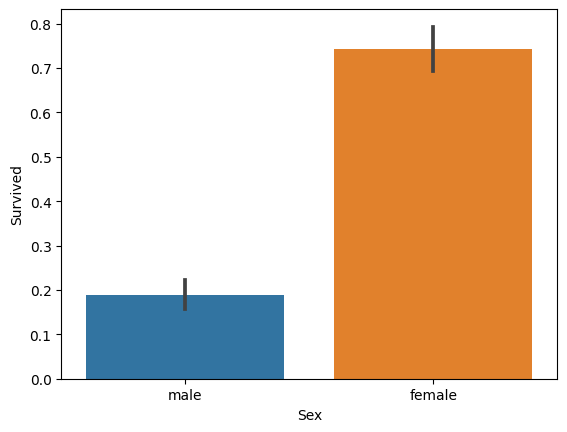

In [13]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)
# 검은바 : 95% 신뢰수준 지우고 싶으면 ci = none

In [14]:
titanic_df.groupby(['SibSp','Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

<AxesSubplot: xlabel='SibSp', ylabel='Survived'>

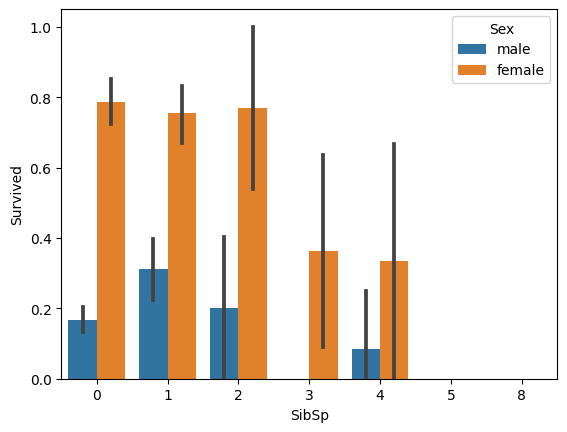

In [15]:
sns.barplot(x='SibSp',y='Survived',hue='Sex',data=titanic_df)

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

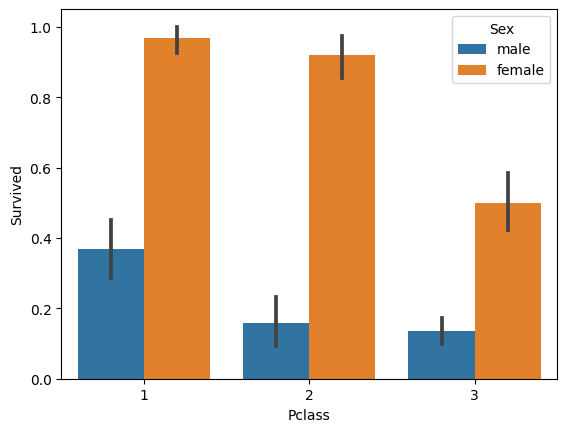

In [16]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

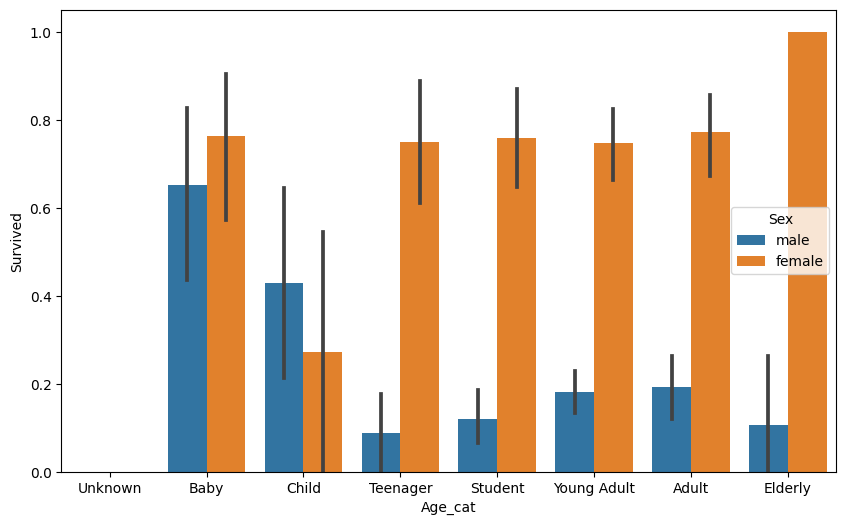

In [17]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정.   DataFrame의 apply lambda식에 사용
def get_category(age):
    cat=''
    if age <=-1 : cat="Unknown"
    elif age <=5 : cat="Baby"
    elif age <=12 : cat="Child"
    elif age <=18 : cat="Teenager"
    elif age <=25 : cat="Student"
    elif age <=35 : cat="Young Adult"
    elif age <=60 : cat="Adult"
    else : cat = "Elderly"
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names=["Unknown","Baby","Child","Teenager","Student","Young Adult","Adult","Elderly"]

# lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정
# get_category(x)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [18]:
# feature encoding : Label encoding
from sklearn import preprocessing

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,7,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,7,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,7,S


In [19]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

#  앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [20]:
# 원본 데이터를 재로딩하고 feature데이터셋과 Label 데이터셋 추출
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f"DecisionTreeClassifier 정확도 : {accuracy_score(y_test, dt_pred) : .4f}")

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f"RandomForestClassifier 정확도 : {accuracy_score(y_test, rf_pred) : .4f}")

# Logisticregression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f"LogisticRegression 정확도 : {accuracy_score(y_test, lr_pred) : .4f}")

DecisionTreeClassifier 정확도 :  0.7877
RandomForestClassifier 정확도 :  0.8547
LogisticRegression 정확도 :  0.8492


<frozen importlib._bootstrap>:241: RuntimeWarning: sklearn.tree._splitter.Splitter size changed, may indicate binary incompatibility. Expected 360 from C header, got 1160 from PyObject


In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [24]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트가 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)) :
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리킨 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)

        print(f"교차검증 {iter_count} 정확도 : {accuracy : .4f}")
    
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print(f"평균 정확도 : {mean_score:.4f}")

# exec_kfold 호출    
exec_kfold(dt_clf, folds=5)

교차검증 0 정확도 :  0.7542
교차검증 1 정확도 :  0.7809
교차검증 2 정확도 :  0.7865
교차검증 3 정확도 :  0.7697
교차검증 4 정확도 :  0.8202
평균 정확도 : 0.7823


In [25]:
# 교차검증을 cross_val_score() API를 이용해 수행
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores) :
    print(f"교차검증 {iter_count} 정확도 : {accuracy:.4f}")
    
print(f"평균 정확도 : {np.mean(scores):.4f}")

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth" : [2, 3, 5, 10],
              "min_samples_split" : [2, 3, 5],
              "min_samples_leaf" : [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring="accuracy", cv=5)
grid_dclf.fit(X_train, y_train)

print(f"GridSearchCV 최적 하이퍼 파라미터 : {grid_dclf.best_params_}")
print(f"GridSearchCV 최고 정확도 : {grid_dclf.best_score_:.4f}")
best_dclf = grid_dclf.best_estimator_

# GridSearhCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print(f"테스트 세트에서의 DecisionTreeClassifier 정확도 : {accuracy:.4f}")

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


In [27]:
precision = precision_score(y_test, dpredictions)
recall = recall_score(y_test, dpredictions)
print(f'테스트 세트에서의 DecisionTreeClassifier 정밀도 : {precision:.4f}')
print(f'테스트 세트에서의 DecisionTreeClassifier 재현율 : {recall:.4f}')

테스트 세트에서의 DecisionTreeClassifier 정밀도 : 0.8393
테스트 세트에서의 DecisionTreeClassifier 재현율 : 0.7705
